# Multi-Lingual Embeddings Test

Testing the hypothesis: Do semantically similar sentences in different languages produce high cosine similarity scores?

In [1]:
# Install required packages
# %pip install sentence-transformers numpy scikit-learn pandas matplotlib

In [2]:
# Import libraries
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load multilingual model
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
print(f"Model loaded: {model.get_sentence_embedding_dimension()} dimensions")

Model loaded: 384 dimensions


In [4]:
# Test data: semantically similar phrases in different languages
test_pairs = [
    ("Hello world", "Hola mundo"),    # English-Spanish
    ("Hello world", "Hola MuNdo"),    # English-Spanish
    ("Hello world", "HOLA mundo"),    # English-Spanish
    ("Hello world", "hOLA MUNDO"),    # English-Spanish
    ("hello world", "hola a todos"),  # English-Spanish
]

# Calculate similarities
results = []
for phrase1, phrase2 in test_pairs:
    v1 = model.encode([phrase1])
    v2 = model.encode([phrase2])
    similarity = cosine_similarity(v1, v2)[0][0]
   
    results.append({
        'Phrase 1': phrase1,
        'Phrase 2': phrase2,
        'Similarity': similarity
    })

# Display results
df = pd.DataFrame(results)
print(df)
print(f"\nAverage similarity: {df['Similarity'].mean():.3f}")

      Phrase 1      Phrase 2  Similarity
0  Hello world    Hola mundo    0.883396
1  Hello world    Hola MuNdo    0.586836
2  Hello world    HOLA mundo    0.704719
3  Hello world    hOLA MUNDO    0.686061
4  hello world  hola a todos    0.864724

Average similarity: 0.745


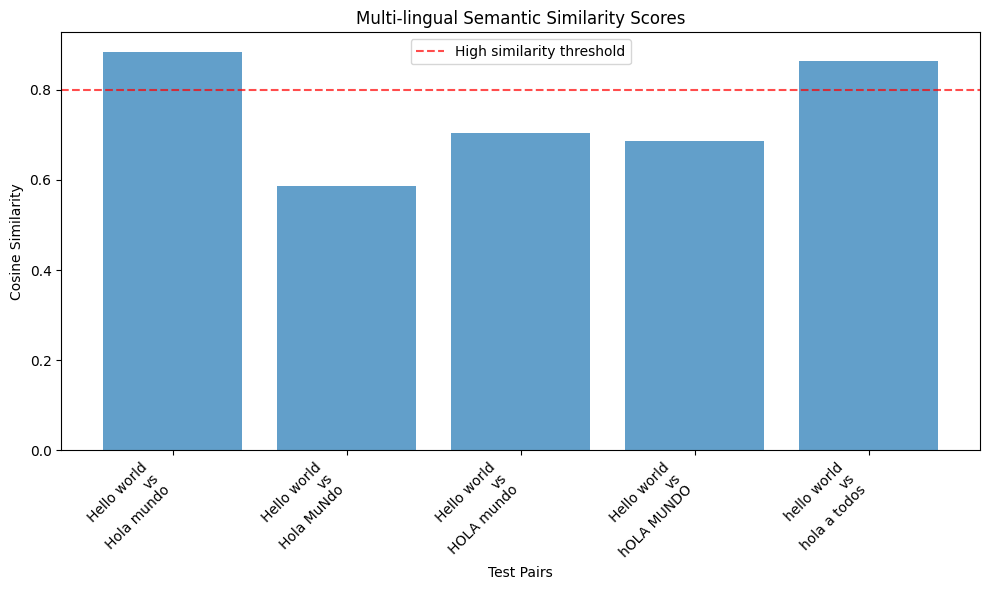

In [5]:
# Visualize results
plt.figure(figsize=(10, 6))
plt.bar(range(len(results)), df['Similarity'], alpha=0.7)
plt.xlabel('Test Pairs')
plt.ylabel('Cosine Similarity')
plt.title('Multi-lingual Semantic Similarity Scores')
plt.xticks(range(len(results)), [f"{r['Phrase 1']}\nvs\n{r['Phrase 2']}" for r in results], rotation=45, ha='right')
plt.axhline(y=0.8, color='r', linestyle='--', alpha=0.7, label='High similarity threshold')
plt.legend()
plt.tight_layout()
plt.show()